In [1]:
from collections import Counter
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-2])
DATA_PATH = f'{ROOT_PATH}/TIL/Dataset/DOODLE'

df         = pd.read_csv(f'{DATA_PATH}/birth_yearly.csv',  encoding = 'euc-kr').T
df.columns = df.iloc[0]
df         = df.drop(['자연증가건수(명)', '조출생률(천명당)', '자연증가율(천명당)', '합계출산율(명)'], axis = 1).loc['1972':]

In [3]:
korean_zodiac = {
                    4 : 'Mouse', 5 : 'Cow', 6 : 'Tiger', 7 : 'Rabbit', 8 : 'Dragon', 9 : 'Snake',
                    10 : 'Horse', 11 : 'Sheep' , 0 : 'Monkey', 1 : 'Chicken', 2 : 'Dog', 3 : 'Pig'
                }

zodiac_cnt    = {v : 0 for k, v in korean_zodiac.items()}

<Axes: >

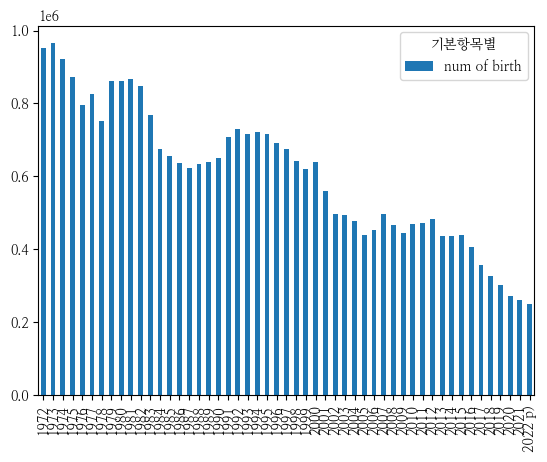

In [4]:
## 1972년이 쥐띠 해여서 1972년 부터 시작
df_year = df.drop(['출생성비(명)'], axis = 1)
df_year.rename(columns = {'출생아수(명)' : 'num of birth'}, inplace = True)
df_year.plot.bar()

In [5]:
clear_num = lambda x: int(re.sub('[^0-9]', '', x))
zodiac    = [korean_zodiac[clear_num(year) % 12] for year in df_year.index]

In [6]:
df_year['zodiac'] = zodiac

for year in df_year.iterrows():
    
    pop, zod         = year[1]
    zodiac_cnt[zod] += pop

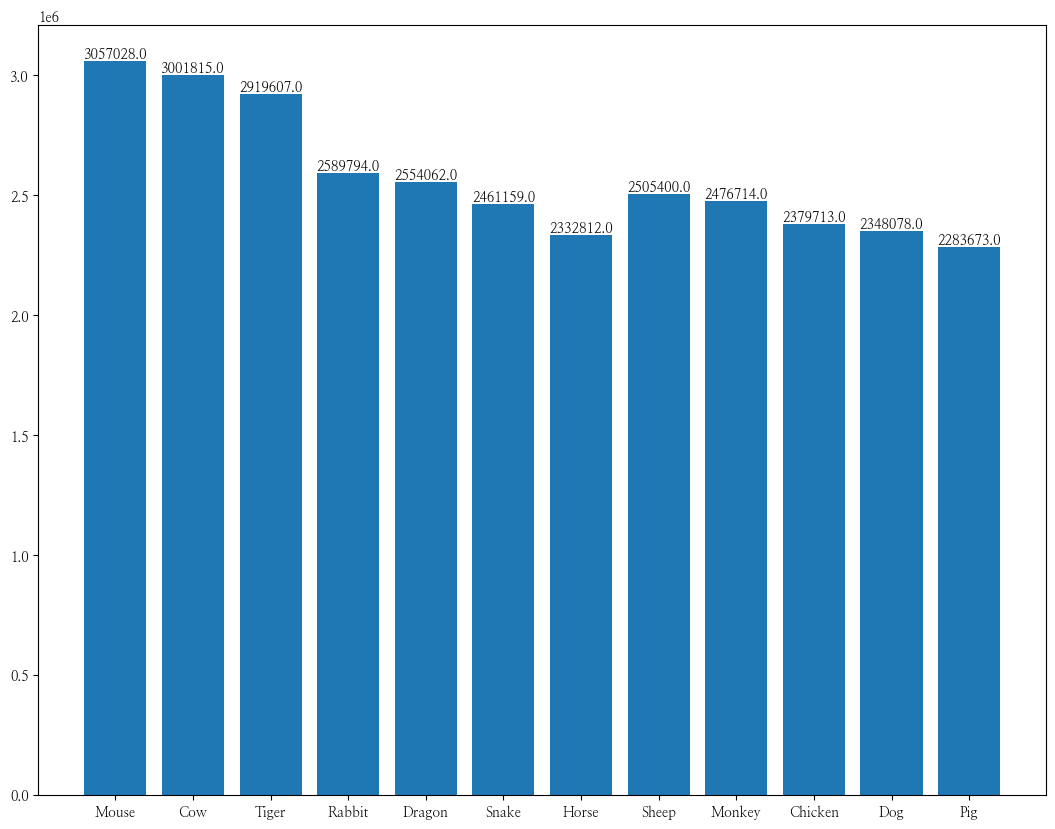

In [7]:
plt.figure(figsize = (13, 10))

plt.bar(zodiac_cnt.keys(), zodiac_cnt.values())

for k, v in zodiac_cnt.items():
    plt.text(
                k, v, v,
                verticalalignment = 'bottom',
                horizontalalignment = 'center'
            )

In [8]:
df.rename(columns = {'출생아수(명)' : 'num of birth', '출생성비(명)' : 'gender ratio'}, inplace = True)
df['gender ratio'] = df['gender ratio'].apply(lambda x: x / 100)

df['num of female'] = df['num of birth'] / (1 + df['gender ratio'])
df['num of male']   = df['num of birth'] - df['num of female']

df['diff']          = np.abs(df['num of male'] - df['num of female'])

## 출생성비는 남아 기준으로 표시되어있다.
## e.g.) 105.0 -> 여아 100명당 남아 105명
df.sample(3).T

,2003,1981,2005
기본항목별,,,
num of birth,495036.0,867409.0,438707.0
gender ratio,1.086,1.071,1.078
num of female,237313.518696,418835.828102,211119.826756
num of male,257722.481304,448573.171898,227587.173244
diff,20408.962608,29737.343795,16467.346487


In [9]:
max_ratio_y = df[df['gender ratio'] == np.max(df['gender ratio'])].index[0]
min_ratio_y = df[df['gender ratio'] == np.min(df['gender ratio'])].index[0]

max_diff    = int(df.loc[max_ratio_y]['diff'])
min_diff    = int(df.loc[min_ratio_y]['diff'])

max_ratio_y, min_ratio_y, max_diff, min_diff

('1990', '1977', 49518, 16975)

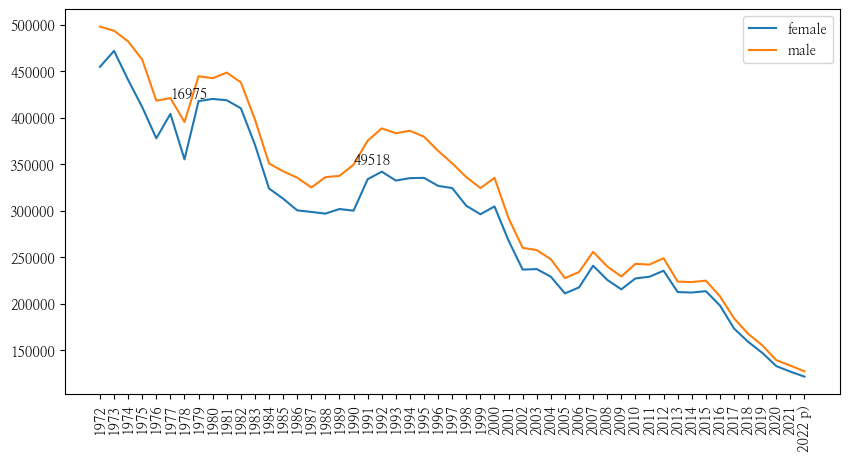

In [10]:
years = df.index.to_list()

plt.figure(figsize = (10, 5))
plt.plot(years, df['num of female'], label = 'female')
plt.plot(years,   df['num of male'], label =   'male')


plt.text(max_ratio_y, int(df.loc[max_ratio_y]['num of male'] + 20), max_diff)
plt.text(min_ratio_y, int(df.loc[min_ratio_y]['num of male'] + 20), min_diff)
plt.xticks(rotation = 90)
plt.legend()

In [11]:
zodiac_female_cnt = {v : 0 for v in korean_zodiac.values()}
zodiac_male_cnt   = {v : 0 for v in korean_zodiac.values()}
df['zodiac']      = zodiac

for _, data in df.iterrows():

    _, _, pop_female, pop_male, *_, zodiac = data
    zodiac_female_cnt[zodiac] += pop_female
    zodiac_male_cnt[zodiac]   += pop_male

zodiac_female_cnt, zodiac_male_cnt

({'Mouse': 1464260.7846752002,
  'Cow': 1451904.436683097,
  'Tiger': 1395395.2588898598,
  'Rabbit': 1235636.157146183,
  'Dragon': 1215113.5944217066,
  'Snake': 1186589.6652052498,
  'Horse': 1104233.9885133728,
  'Sheep': 1202757.8224572951,
  'Monkey': 1189611.565695118,
  'Chicken': 1135856.7424979075,
  'Dog': 1122057.244795065,
  'Pig': 1094639.3621082362},
 {'Mouse': 1592767.2153247998,
  'Cow': 1549910.563316903,
  'Tiger': 1524211.7411101402,
  'Rabbit': 1354157.842853817,
  'Dragon': 1338948.4055782934,
  'Snake': 1274569.3347947502,
  'Horse': 1228578.0114866272,
  'Sheep': 1302642.1775427046,
  'Monkey': 1287102.434304882,
  'Chicken': 1243856.2575020925,
  'Dog': 1226020.755204935,
  'Pig': 1189033.6378917638})

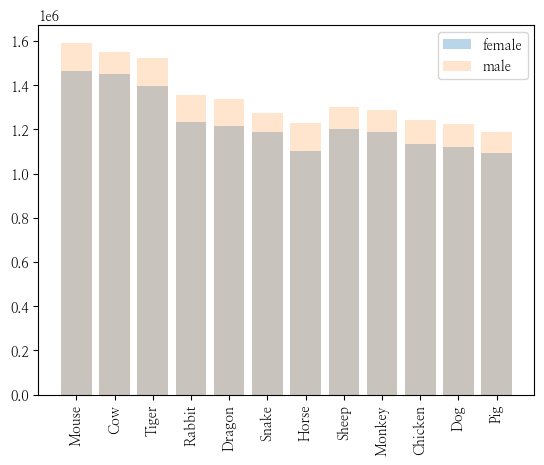

In [12]:
plt.bar(zodiac_female_cnt.keys(), zodiac_female_cnt.values(), alpha = 0.3, label = 'female')
plt.bar(zodiac_male_cnt.keys()  , zodiac_male_cnt.values()  , alpha = 0.2, label = 'male')

plt.xticks(rotation = 90)
plt.legend()